In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = "/content/drive/MyDrive/samocat/results_scoring_17_57.csv"
data = pd.read_csv(DATA_PATH, index_col=0)
display(data)

,average_speed,peak_speed,average_acceleration,peak_acceleration,rapid_overclock,hard_braking,class_predicted
0,6.443223,7.388889,-0.011087,0.977465,0.0,0.0,1
1,5.237365,7.500000,-0.007952,2.199546,0.0,0.0,2
2,4.968280,7.083333,-0.030921,1.382306,0.0,0.0,1
3,6.049740,7.500000,-0.029479,1.229105,0.0,3.0,1
4,6.428615,7.555556,-0.062866,0.950728,0.0,0.0,1
...,...,...,...,...,...,...,...
22498,3.907132,6.750000,0.003167,1.248171,0.0,0.0,0
22499,4.830391,7.611111,-0.052442,2.365561,0.0,1.0,2
22500,5.389947,7.250000,-0.014757,0.748727,0.0,0.0,1
22501,4.175000,6.722222,-0.012502,0.781178,0.0,0.0,0


In [3]:
clust_0 = data[data.class_predicted == 0]
clust_1 = data[data.class_predicted == 1]
clust_2 = data[data.class_predicted == 2]

In [4]:
n = data.shape[0]
print('class_0_perc :', clust_0.shape[0] * 100 / n)
print('class_1_perc :', clust_1.shape[0] * 100 / n)
print('class_2_perc :', clust_2.shape[0] * 100 / n)

class_0_perc : 35.93743056481358
class_1_perc : 38.897035950762124
class_2_perc : 25.165533484424298


In [5]:
def clustering_hist(column):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

  fig.suptitle(f'{column} in different clusters')

  left = np.min(data[column])
  right = np.max(data[column])

  clust_0.hist(column=column, ax=ax1, bins=25, color='g')
  ax1.set_xlabel(column)
  ax1.set_xlim([left, right])
  ax1.set_title('clust_0')

  clust_1.hist(column=column, ax=ax2, bins=25, color='yellow') 
  ax1.set_xlabel(column)
  ax2.set_xlim([left, right])
  ax2.set_title('clust_1')

  clust_2.hist(column=column, ax=ax3, bins=25, color='r')
  ax3.set_xlabel(column)
  ax3.set_xlim([left, right])
  ax3.set_title('clust_2')

  plt.show()

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 6

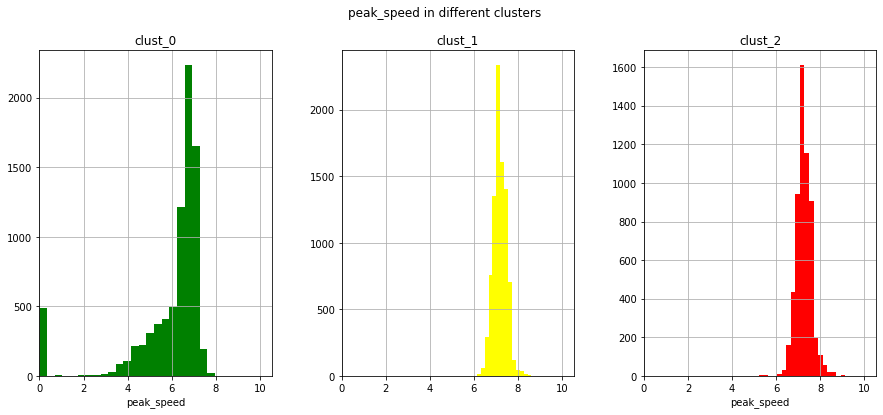

In [7]:
clustering_hist('peak_speed')

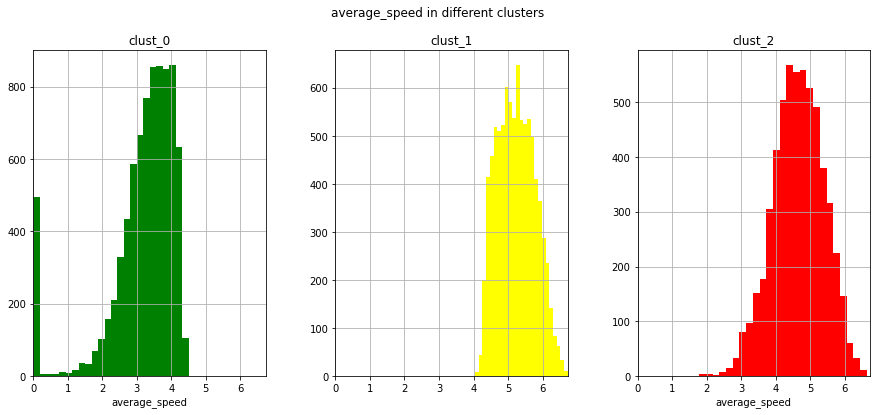

In [8]:
clustering_hist('average_speed')

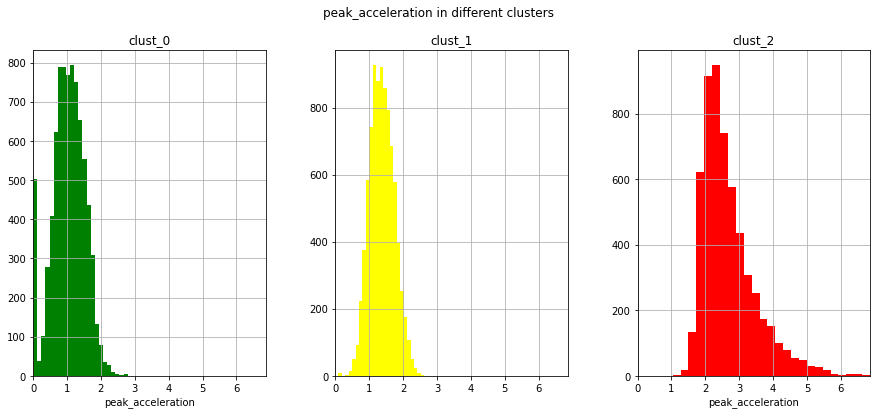

In [9]:
clustering_hist('peak_acceleration')

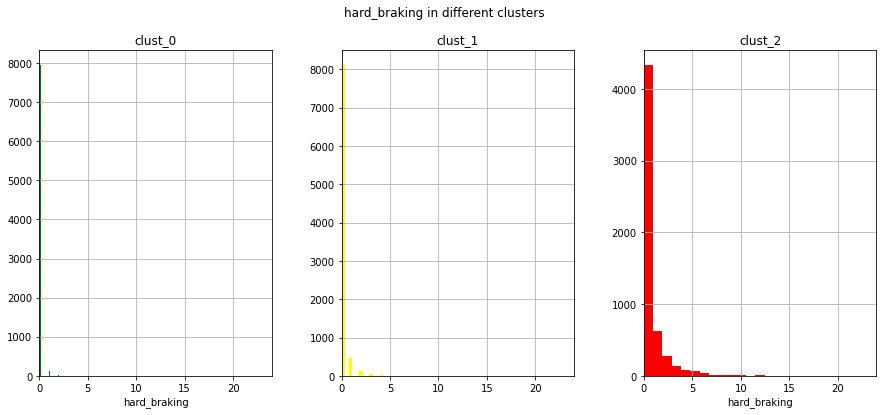

In [10]:
clustering_hist('hard_braking')

In [11]:
colors = {0: 'green', 1: 'yellow', 2: 'red'}

data['color'] = [colors[data.class_predicted[i]] for i in range(data.shape[0])]
data

,average_speed,peak_speed,average_acceleration,peak_acceleration,rapid_overclock,hard_braking,class_predicted,color
0,6.443223,7.388889,-0.011087,0.977465,0.0,0.0,1,yellow
1,5.237365,7.500000,-0.007952,2.199546,0.0,0.0,2,red
2,4.968280,7.083333,-0.030921,1.382306,0.0,0.0,1,yellow
3,6.049740,7.500000,-0.029479,1.229105,0.0,3.0,1,yellow
4,6.428615,7.555556,-0.062866,0.950728,0.0,0.0,1,yellow
...,...,...,...,...,...,...,...,...
22498,3.907132,6.750000,0.003167,1.248171,0.0,0.0,0,green
22499,4.830391,7.611111,-0.052442,2.365561,0.0,1.0,2,red
22500,5.389947,7.250000,-0.014757,0.748727,0.0,0.0,1,yellow
22501,4.175000,6.722222,-0.012502,0.781178,0.0,0.0,0,green


In [12]:
data['recommendation'] = ''

In [13]:
# peak_acceleration
data.loc[data.peak_acceleration >= 3.0, 'recommendation'] = 'Резкие ускорения и торможения на дорогах - не лучшее решение, не подвергай опасности себя и окружающих!'

In [14]:
# average_speed
data.loc[(data.average_speed >= 5.56) & (data.recommendation == ''), 'recommendation'] = 'Сбавь скорость, так гонять небезопасно!'

In [15]:
# peak_speed
data.loc[(data.peak_speed >= 7.3) & (data.recommendation == ''), 'recommendation'] = 'Дружище, помедленнее! Побереги себя и окружающих!'

In [16]:
# hard_braking
data.loc[(data.hard_braking >= 1.0) & (data.recommendation == ''), 'recommendation'] = 'Будь осторожнее! Лучше тормозить заранее!'

In [17]:
# dangerous riders
print(data[data.recommendation != ''].recommendation.value_counts() * 100 / data.shape[0])

Дружище, помедленнее! Побереги себя и окружающих!                                                          14.820246
Сбавь скорость, так гонять небезопасно!                                                                    13.109363
Резкие ускорения и торможения на дорогах - не лучшее решение, не подвергай опасности себя и окружающих!     6.741323
Будь осторожнее! Лучше тормозить заранее!                                                                   2.915167
Name: recommendation, dtype: float64


In [18]:
data.loc[(data.peak_acceleration >= 2.3) & (data.recommendation == ''), 'recommendation'] = 'Отличная поездка, но в следующий раз разгоняйся, пожалуйста, помедленнее! :)'

In [19]:
data.loc[(data.peak_speed >= 6.9) & (data.recommendation == ''), 'recommendation'] = 'Отличная поездка! Но иногда все же лучше сбавить скорость, гонщик :)'

In [20]:
print(data[data.recommendation == ''].color.value_counts())

green     5912
yellow    1323
red        241
Name: color, dtype: int64


In [21]:
data.loc[(data.color == 'green') & (data.recommendation == ''), 'recommendation'] = 'Отличная поездка, дружище! До скорой встречи! :)'
data.loc[(data.color == 'yellow') & (data.recommendation == ''), 'recommendation'] = 'Отличная поездка, дружище! Только будь в следующий раз чуточку аккуратнее :)'
data.loc[(data.color == 'red') & (data.recommendation == ''), 'recommendation'] = 'Отличная поездка, дружище! Только не забывай о безопасности :)'

In [22]:
# all recommendations
print(data[data.recommendation != ''].recommendation.value_counts() * 100 / data.shape[0])

Отличная поездка, дружище! До скорой встречи! :)                                                           26.272053
Отличная поездка! Но иногда все же лучше сбавить скорость, гонщик :)                                       24.787806
Дружище, помедленнее! Побереги себя и окружающих!                                                          14.820246
Сбавь скорость, так гонять небезопасно!                                                                    13.109363
Резкие ускорения и торможения на дорогах - не лучшее решение, не подвергай опасности себя и окружающих!     6.741323
Отличная поездка, дружище! Только будь в следующий раз чуточку аккуратнее :)                                5.879216
Отличная поездка, но в следующий раз разгоняйся, пожалуйста, помедленнее! :)                                4.403857
Будь осторожнее! Лучше тормозить заранее!                                                                   2.915167
Отличная поездка, дружище! Только не забывай о безопасности :)  

In [23]:
def recommendation_func(data):
  colors = {0: 'green', 1: 'yellow', 2: 'red'}

  data['color'] = [colors[data.class_predicted[i]] for i in range(data.shape[0])]
  data['recommendation'] = ''

  data.loc[data.peak_acceleration >= 3.0, 'recommendation'] = 'Резкие ускорения и торможения на дорогах - не лучшее решение, не подвергай опасности себя и окружающих!'
  data.loc[(data.average_speed >= 5.56) & (data.recommendation == ''), 'recommendation'] = 'Сбавь скорость, так гонять небезопасно!'
  data.loc[(data.peak_speed >= 7.3) & (data.recommendation == ''), 'recommendation'] = 'Дружище, помедленнее! Побереги себя и окружающих!'
  data.loc[(data.hard_braking >= 1.0) & (data.recommendation == ''), 'recommendation'] = 'Будь осторожнее! Лучше тормозить заранее!'

  data.loc[(data.peak_acceleration >= 2.3) & (data.recommendation == ''), 'recommendation'] = 'Отличная поездка, но в следующий раз разгоняйся, пожалуйста, помедленнее! :)'
  data.loc[(data.peak_speed >= 6.9) & (data.recommendation == ''), 'recommendation'] = 'Отличная поездка! Но иногда все же лучше сбавить скорость, гонщик :)'

  data.loc[(data.color == 'green') & (data.recommendation == ''), 'recommendation'] = 'Отличная поездка, дружище! До скорой встречи! :)'
  data.loc[(data.color == 'yellow') & (data.recommendation == ''), 'recommendation'] = 'Отличная поездка, дружище! Только будь в следующий раз чуточку аккуратнее :)'
  data.loc[(data.color == 'red') & (data.recommendation == ''), 'recommendation'] = 'Отличная поездка, дружище! Только не забывай о безопасности :)'

  print(data[data.recommendation != ''].recommendation.value_counts() * 100 / data.shape[0])

In [24]:
data = pd.read_csv(DATA_PATH, index_col=0)
recommendation_func(data)

Отличная поездка, дружище! До скорой встречи! :)                                                           26.272053
Отличная поездка! Но иногда все же лучше сбавить скорость, гонщик :)                                       24.787806
Дружище, помедленнее! Побереги себя и окружающих!                                                          14.820246
Сбавь скорость, так гонять небезопасно!                                                                    13.109363
Резкие ускорения и торможения на дорогах - не лучшее решение, не подвергай опасности себя и окружающих!     6.741323
Отличная поездка, дружище! Только будь в следующий раз чуточку аккуратнее :)                                5.879216
Отличная поездка, но в следующий раз разгоняйся, пожалуйста, помедленнее! :)                                4.403857
Будь осторожнее! Лучше тормозить заранее!                                                                   2.915167
Отличная поездка, дружище! Только не забывай о безопасности :)  